# Linear Regression

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [24]:
df = pd.read_csv('Resources/df30.csv', index_col=[0])
df.head()

,fire_name,fire_size,fire_cause,latitude,longitude,state,discovery_month,putout_time,veg_label,Temp_pre_30,Wind_pre_30,Hum_pre_30,Prec_pre_30,remoteness,year
3,WNA 1,1.00,Debris Burning,39.6414,-119.3083,NV,Jun,0,Other,16.275967,4.054982,44.778429,10.4,0.487447,2005
9,CRAZY,1.00,Other,48.8394,-99.7185,ND,Apr,0,Polar Desert/Rock/Ice,4.600950,6.380760,64.606509,12.3,0.291683,2004
26,STO3573155,2.00,Debris Burning,35.7189,-92.3350,AR,Jan,0,Polar Desert/Rock/Ice,3.490698,1.347442,76.091398,0.0,0.227270,2014
31,AXE RONDEAU,1.20,Debris Burning,48.8330,-99.7836,ND,Apr,0,Polar Desert/Rock/Ice,-0.891635,5.800667,77.575012,21.2,0.292303,2007
35,FY2001-EARLY-021,30.18,Debris Burning,31.2590,-84.8956,GA,Oct,0,Open Shrubland,20.079480,3.659840,67.551783,0.0,0.162416,2000


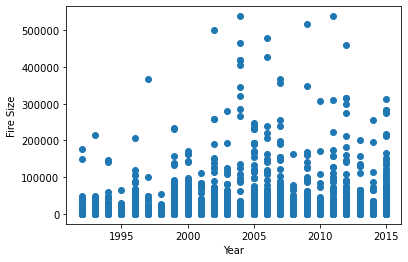

In [25]:
plt.scatter(df.year, df.fire_size)
plt.xlabel('Year')
plt.ylabel('Fire Size')
plt.show()

---------------------------

# Unsupervised Machine Learning

In [26]:
import os
os.environ["MKL_NUM_THREADS"] = "1"

import pandas as pd
import plotly.express as px
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [27]:
df

,fire_name,fire_size,fire_cause,latitude,longitude,state,discovery_month,putout_time,veg_label,Temp_pre_30,Wind_pre_30,Hum_pre_30,Prec_pre_30,remoteness,year
3,WNA 1,1.00,Debris Burning,39.641400,-119.308300,NV,Jun,0,Other,16.275967,4.054982,44.778429,10.4,0.487447,2005
9,CRAZY,1.00,Other,48.839400,-99.718500,ND,Apr,0,Polar Desert/Rock/Ice,4.600950,6.380760,64.606509,12.3,0.291683,2004
26,STO3573155,2.00,Debris Burning,35.718900,-92.335000,AR,Jan,0,Polar Desert/Rock/Ice,3.490698,1.347442,76.091398,0.0,0.227270,2014
31,AXE RONDEAU,1.20,Debris Burning,48.833000,-99.783600,ND,Apr,0,Polar Desert/Rock/Ice,-0.891635,5.800667,77.575012,21.2,0.292303,2007
35,FY2001-EARLY-021,30.18,Debris Burning,31.259000,-84.895600,GA,Oct,0,Open Shrubland,20.079480,3.659840,67.551783,0.0,0.162416,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55342,PINECREST,5086.00,Debris Burning,45.656100,-109.114200,MT,Mar,5,Polar Desert/Rock/Ice,2.275974,4.428757,51.676681,0.0,0.046649,2015
55343,WALKER,5963.00,Debris Burning,43.785671,-115.985922,ID,Oct,10,C3 Grassland/Steppe,17.007551,1.580406,51.541802,0.0,0.060013,2015
55349,BROWN RANCH,17831.00,Other,30.005000,-100.391167,TX,Aug,6,Open Shrubland,28.113120,4.245387,60.470917,0.0,0.451149,2015
55350,PRICKLEY PEAR,3452.00,Other,30.400883,-101.331933,TX,Aug,2,Open Shrubland,31.270833,3.455211,44.411268,4.6,0.429604,2015


In [28]:
df_ana=df.drop(columns=["fire_name", 'latitude', 'longitude', 'state'])
df_ana

,fire_size,fire_cause,discovery_month,putout_time,veg_label,Temp_pre_30,Wind_pre_30,Hum_pre_30,Prec_pre_30,remoteness,year
3,1.00,Debris Burning,Jun,0,Other,16.275967,4.054982,44.778429,10.4,0.487447,2005
9,1.00,Other,Apr,0,Polar Desert/Rock/Ice,4.600950,6.380760,64.606509,12.3,0.291683,2004
26,2.00,Debris Burning,Jan,0,Polar Desert/Rock/Ice,3.490698,1.347442,76.091398,0.0,0.227270,2014
31,1.20,Debris Burning,Apr,0,Polar Desert/Rock/Ice,-0.891635,5.800667,77.575012,21.2,0.292303,2007
35,30.18,Debris Burning,Oct,0,Open Shrubland,20.079480,3.659840,67.551783,0.0,0.162416,2000
...,...,...,...,...,...,...,...,...,...,...,...
55342,5086.00,Debris Burning,Mar,5,Polar Desert/Rock/Ice,2.275974,4.428757,51.676681,0.0,0.046649,2015
55343,5963.00,Debris Burning,Oct,10,C3 Grassland/Steppe,17.007551,1.580406,51.541802,0.0,0.060013,2015
55349,17831.00,Other,Aug,6,Open Shrubland,28.113120,4.245387,60.470917,0.0,0.451149,2015
55350,3452.00,Other,Aug,2,Open Shrubland,31.270833,3.455211,44.411268,4.6,0.429604,2015


In [29]:
obj_cat = df_ana.dtypes[df_ana.dtypes == "object"].index.tolist()
obj_cat

['fire_cause', 'discovery_month', 'veg_label']

In [30]:
# Check the number of unique values in each column
df_ana[obj_cat].nunique()

fire_cause          6
discovery_month    12
veg_label           7
dtype: int64

In [31]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_ana[obj_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(obj_cat)
encode_df.head()

,fire_cause_Accidental,fire_cause_Arson,fire_cause_Debris Burning,fire_cause_Lightning,fire_cause_Other,fire_cause_Utilities,discovery_month_Apr,discovery_month_Aug,discovery_month_Dec,discovery_month_Feb,...,discovery_month_Nov,discovery_month_Oct,discovery_month_Sep,veg_label_C3 Grassland/Steppe,veg_label_Desert,veg_label_Open Shrubland,veg_label_Other,veg_label_Polar Desert/Rock/Ice,veg_label_Secondary Tropical Evergreen Broadleaf Forest,veg_label_Temperate Evergreen Needleleaf Forest TmpENF
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [32]:
# Merge one-hot encoded features and drop the originals
df_ana = df_ana.merge(encode_df,left_index=True, right_index=True)
df_ana = df_ana.drop(obj_cat,1)
df_ana.head()

C:\Users\KATLIN\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,fire_size,putout_time,Temp_pre_30,Wind_pre_30,Hum_pre_30,Prec_pre_30,remoteness,year,fire_cause_Accidental,fire_cause_Arson,...,discovery_month_Nov,discovery_month_Oct,discovery_month_Sep,veg_label_C3 Grassland/Steppe,veg_label_Desert,veg_label_Open Shrubland,veg_label_Other,veg_label_Polar Desert/Rock/Ice,veg_label_Secondary Tropical Evergreen Broadleaf Forest,veg_label_Temperate Evergreen Needleleaf Forest TmpENF
3,1.00,0,16.275967,4.054982,44.778429,10.4,0.487447,2005,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1.00,0,4.600950,6.380760,64.606509,12.3,0.291683,2004,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26,2.00,0,3.490698,1.347442,76.091398,0.0,0.227270,2014,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31,1.20,0,-0.891635,5.800667,77.575012,21.2,0.292303,2007,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35,30.18,0,20.079480,3.659840,67.551783,0.0,0.162416,2000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
# Function to cluster and plot dataset
def test_cluster_amount(df, clusters):
    model = KMeans(n_clusters=clusters, random_state=5)
    model

    # Fitting model
    model.fit(df)

    # Add a new class column to df
    df["class"] = model.labels_

In [34]:
# Elbow Curve

inertia = []
k = list(range(1, 11))

# Looking for the best K
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_ana)
    inertia.append(km.inertia_)
    
# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

In [35]:
test_cluster_amount(df_ana, 3)
df_ana.hvplot.scatter(x="year", y="fire_size", by="class")

:NdOverlay   [class]
   :Scatter   [year]   (fire_size)

In [36]:
df_ana

,fire_size,putout_time,Temp_pre_30,Wind_pre_30,Hum_pre_30,Prec_pre_30,remoteness,year,fire_cause_Accidental,fire_cause_Arson,...,discovery_month_Oct,discovery_month_Sep,veg_label_C3 Grassland/Steppe,veg_label_Desert,veg_label_Open Shrubland,veg_label_Other,veg_label_Polar Desert/Rock/Ice,veg_label_Secondary Tropical Evergreen Broadleaf Forest,veg_label_Temperate Evergreen Needleleaf Forest TmpENF,class
3,1.00,0,16.275967,4.054982,44.778429,10.4,0.487447,2005,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
9,1.00,0,4.600950,6.380760,64.606509,12.3,0.291683,2004,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
26,2.00,0,3.490698,1.347442,76.091398,0.0,0.227270,2014,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
31,1.20,0,-0.891635,5.800667,77.575012,21.2,0.292303,2007,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
35,30.18,0,20.079480,3.659840,67.551783,0.0,0.162416,2000,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13727,295.00,0,30.586086,2.122627,53.638492,33.0,0.253479,2011,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
13728,6.20,1,6.414002,5.186518,66.390464,13.3,0.285988,2013,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
13732,0.80,2,20.865422,2.751621,49.852161,13.2,0.453496,2005,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
13739,1.45,0,15.646387,3.017485,69.553114,59.9,0.148030,2000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [39]:
# Plotting the clusters with three features
fig = px.scatter_3d(df_ana, x="remoteness", y="fire_size", z='Temp_pre_30', color="class", symbol="class", width=800)
fig.update_layout(legend=dict(x=0,y=1))
fig.show()

In [16]:
df_ana

,fire_size,putout_time,Vegetation,Temp_pre_30,Wind_pre_30,Hum_pre_30,Prec_pre_30,remoteness,year,fire_cause_Accidental,...,discovery_month_Feb,discovery_month_Jan,discovery_month_Jul,discovery_month_Jun,discovery_month_Mar,discovery_month_May,discovery_month_Nov,discovery_month_Oct,discovery_month_Sep,class
3,1.00,0,0,16.275967,4.054982,44.778429,10.4,0.487447,2005,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,1.00,0,15,4.600950,6.380760,64.606509,12.3,0.291683,2004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
26,2.00,0,15,3.490698,1.347442,76.091398,0.0,0.227270,2014,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
31,1.20,0,15,-0.891635,5.800667,77.575012,21.2,0.292303,2007,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
35,30.18,0,12,20.079480,3.659840,67.551783,0.0,0.162416,2000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13727,295.00,0,12,30.586086,2.122627,53.638492,33.0,0.253479,2011,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
13728,6.20,1,15,6.414002,5.186518,66.390464,13.3,0.285988,2013,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
13732,0.80,2,15,20.865422,2.751621,49.852161,13.2,0.453496,2005,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
13739,1.45,0,16,15.646387,3.017485,69.553114,59.9,0.148030,2000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


<AxesSubplot:title={'center':'fire_size'}, xlabel='[class]'>

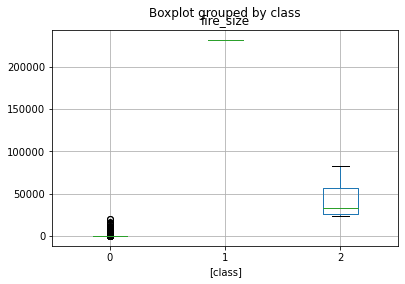

In [17]:
# Plot boxplots of the official time distributions by cluster
df_ana.boxplot(['fire_size'], by=['class'])